In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [11]:
folder_path = 'runs/test_1/vel_1.0_temp_300'

pos_files = glob.glob(os.path.join(folder_path, '**', 'gr*.pos'), recursive=True)

print(pos_files)

['runs/test_1/vel_1.0_temp_300/pos/graphene.68500.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.60400.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.24500.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.4700.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.33500.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.24200.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.73100.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.9700.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.6200.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.51200.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.63500.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.54900.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.53400.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.34200.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.29400.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.63000.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.69200.pos', 'runs/test_1/vel_1.0_temp_300/pos/graphene.17700.pos', 'runs/test_1

In [39]:
def count_data(filepath, bool_graphene=False, r=10):
    def condition(x, y, z, r = 10):
        if x**2 + y**2 <= r**2:
            return True
        return False


    coordinates = []

    with open(filepath, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("ITEM: TIMESTEP"):
                timestep = int(lines[lines.index(line) + 1].strip())
            if line.startswith("ITEM: ATOMS"):
                line_atom = line
                break

        for line in lines[lines.index(line_atom)+1:]:
            if line.strip():
                parts = line.split()
                if len(parts) >= 5:
                    x = float(parts[2])
                    y = float(parts[3])
                    z = float(parts[4])
                    vx = float(parts[5])
                    vy = float(parts[6])
                    vz = float(parts[7])
                    if len(parts) >=9:
                        c = float(parts[8])
                    else:
                        c = -1
                    if bool_graphene:
                        if (condition(x, y, z, r=r)):
                            coordinates.append([x, y, z, vx, vy, vz, c])
                    else:
                        coordinates.append([x, y, z, vx, vy, vz, c])
                    

    coordinates = np.array(coordinates)

    mean_coordinates = np.mean(coordinates, axis=0)

    #print(f"Timestep: {timestep}")
    #print(f"Средние координаты атомов (x, y, z): {mean_coordinates}"
    
    return np.append(mean_coordinates, timestep)

In [40]:
data = []

for filepath in pos_files:
    data.append(count_data(filepath, bool_graphene=True))
data

[array([-1.87790552e-01, -1.76677300e-01,  1.99992658e+01, -2.66938342e-03,
        -4.87087319e-04,  1.94823614e-03,  2.91666667e+00,  6.85000000e+04]),
 array([-2.10736072e-01, -5.11404167e-02,  1.99904783e+01, -2.63484682e-03,
        -8.88616408e-04,  1.95110271e-03,  2.90000000e+00,  6.04000000e+04]),
 array([-1.03542731e-01, -9.32962250e-02,  1.99409275e+01, -2.56002359e-03,
         4.61366692e-04,  4.00924755e-03,  3.68333333e+00,  2.45000000e+04]),
 array([-7.71093433e-02, -7.65790417e-02,  1.98468525e+01, -2.84690833e-03,
        -7.28546517e-04, -1.02732076e-03,  3.00000000e+00,  4.70000000e+03]),
 array([-1.17380789e-01, -9.53802750e-02,  1.99586833e+01, -2.64207911e-03,
        -1.14257372e-03,  1.95906580e-03,  2.90000000e+00,  3.35000000e+04]),
 array([-1.03080738e-01, -9.33739917e-02,  1.99402025e+01, -2.57505746e-03,
         3.95507293e-04,  4.05477190e-03,  3.65000000e+00,  2.42000000e+04]),
 array([-1.35168328e-01, -2.36706798e-01,  2.00047866e+01, -2.60470903e-03,


In [41]:
df = pd.DataFrame(data, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'c', 'Step'])

In [15]:
df = df.sort_values(by='Step')
df

,x,y,z,vx,vy,vz,c,Step
710,-0.015026,-0.052053,20.000000,0.000000,0.000000,0.000000,3.000000,0.0
361,-0.014246,-0.052128,19.993100,0.000000,0.000000,0.000000,3.000000,100.0
416,-0.014391,-0.052070,19.985692,0.000000,0.000000,0.000000,3.000000,200.0
698,-0.014483,-0.052029,19.983300,0.000000,0.000000,0.000000,3.000000,300.0
65,-0.014541,-0.051969,19.984700,0.000000,0.000000,0.000000,3.000000,400.0
...,...,...,...,...,...,...,...,...
533,-0.050280,-0.080507,20.005317,-0.001707,-0.000186,0.001438,2.916667,80700.0
323,-0.050383,-0.080518,20.005404,-0.001709,-0.000185,0.001437,2.916667,80800.0
315,-0.050485,-0.080529,20.005488,-0.001710,-0.000184,0.001437,2.916667,80900.0
739,-0.050587,-0.080539,20.005578,-0.001711,-0.000184,0.001437,2.916667,81000.0


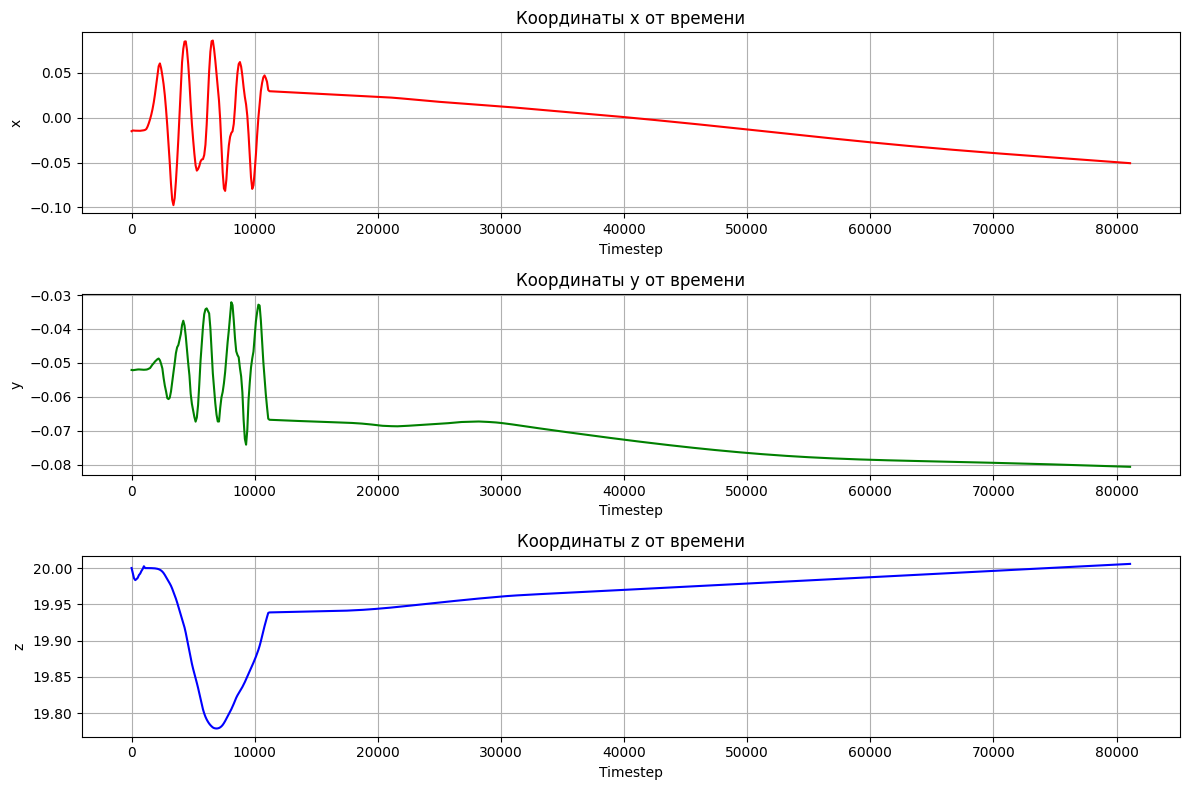

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.Step, df.x, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('x')
plt.title('Координаты x от времени')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.Step, df.y, label='y', color='g')
plt.xlabel('Timestep')
plt.ylabel('y')
plt.title('Координаты y от времени')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.Step, df.z, label='z', color='b')
plt.xlabel('Timestep')
plt.ylabel('z')
plt.title('Координаты z от времени')
plt.grid(True)

plt.tight_layout()
plt.show()

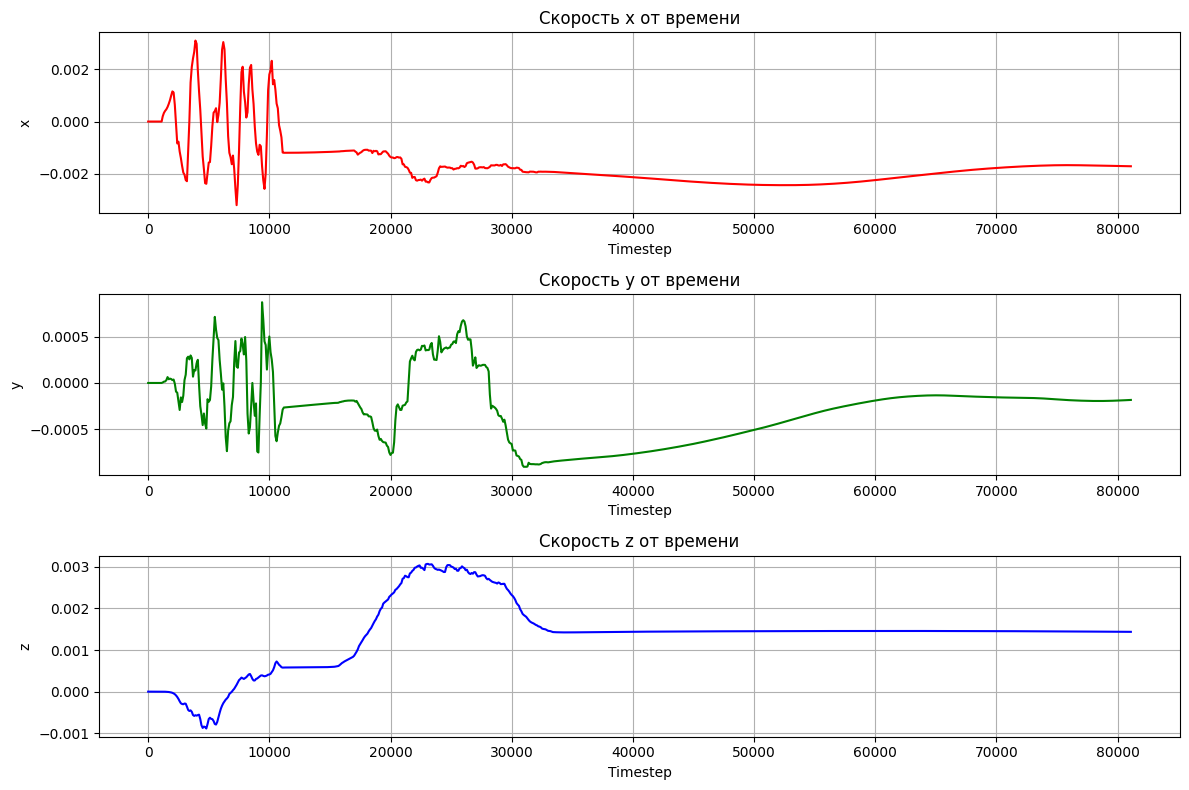

In [17]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.Step, df.vx, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('x')
plt.title('Скорость x от времени')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(df.Step, df.vy, label='y', color='g')
plt.xlabel('Timestep')
plt.ylabel('y')
plt.title('Скорость y от времени')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(df.Step, df.vz, label='z', color='b')
plt.xlabel('Timestep')
plt.ylabel('z')
plt.title('Скорость z от времени')
plt.grid(True)

plt.tight_layout()
plt.show()

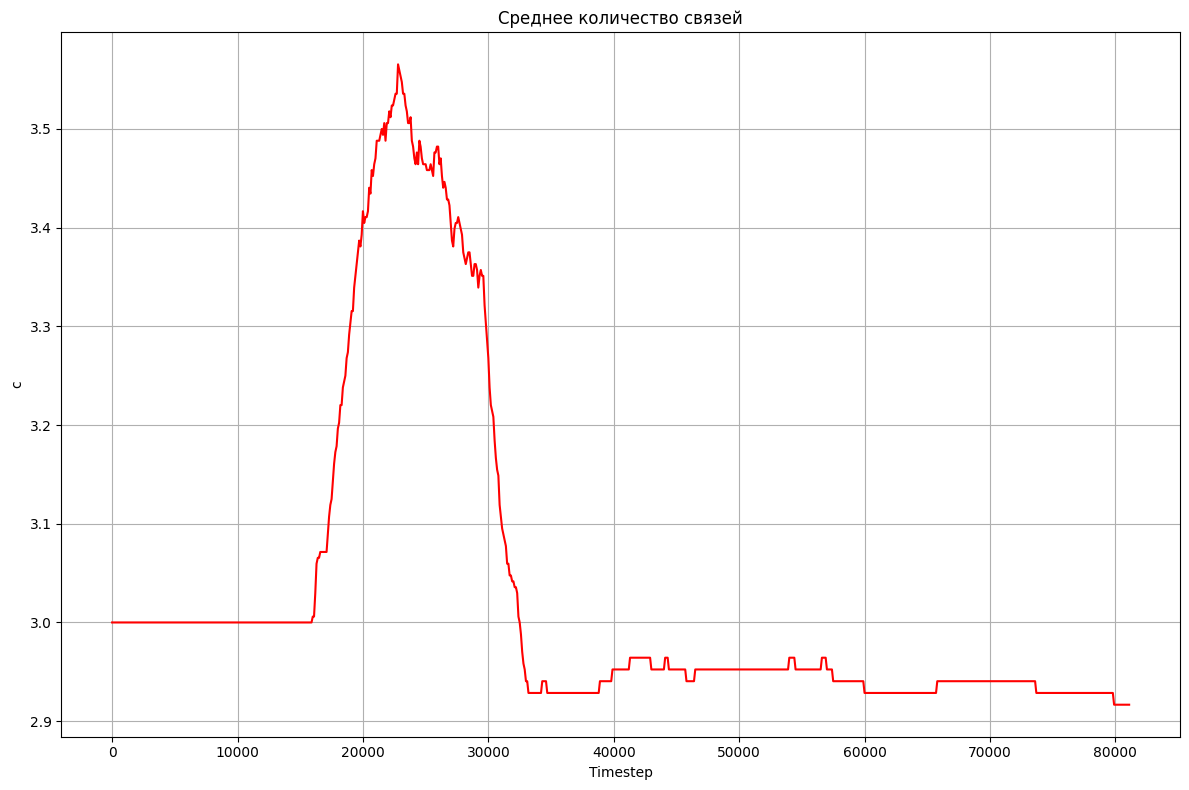

In [18]:
plt.figure(figsize=(12, 8))

plt.plot(df.Step, df.c, label='x', color='r')
plt.xlabel('Timestep')
plt.ylabel('c')
plt.title('Среднее количество связей')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
import re
import pandas as pd

def extract_lammps_data(log_file):
    with open(log_file, 'r') as file:
        log_data = file.read()

    pattern = r"\s*(\d+)\s+([\d\.]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)\s+([\d\.-]+)"

    matches = re.findall(pattern, log_data, re.MULTILINE)

    if matches:
        data = pd.DataFrame(matches, columns=['Step', 'Time', 'Temp', 'PotEng', 'KinEng', 'TotEng', 'Press', 'Volume'])
        
        data = data.apply(pd.to_numeric, errors='ignore')

        return data
    else:
        print("Совпадения не найдены.")
        return None

In [124]:
log_file = folder_path + '/log.lammps' 
data = extract_lammps_data(log_file)

data.Step.unique()

array([     0,    100,    200, ..., 115000, 115100, 115200])

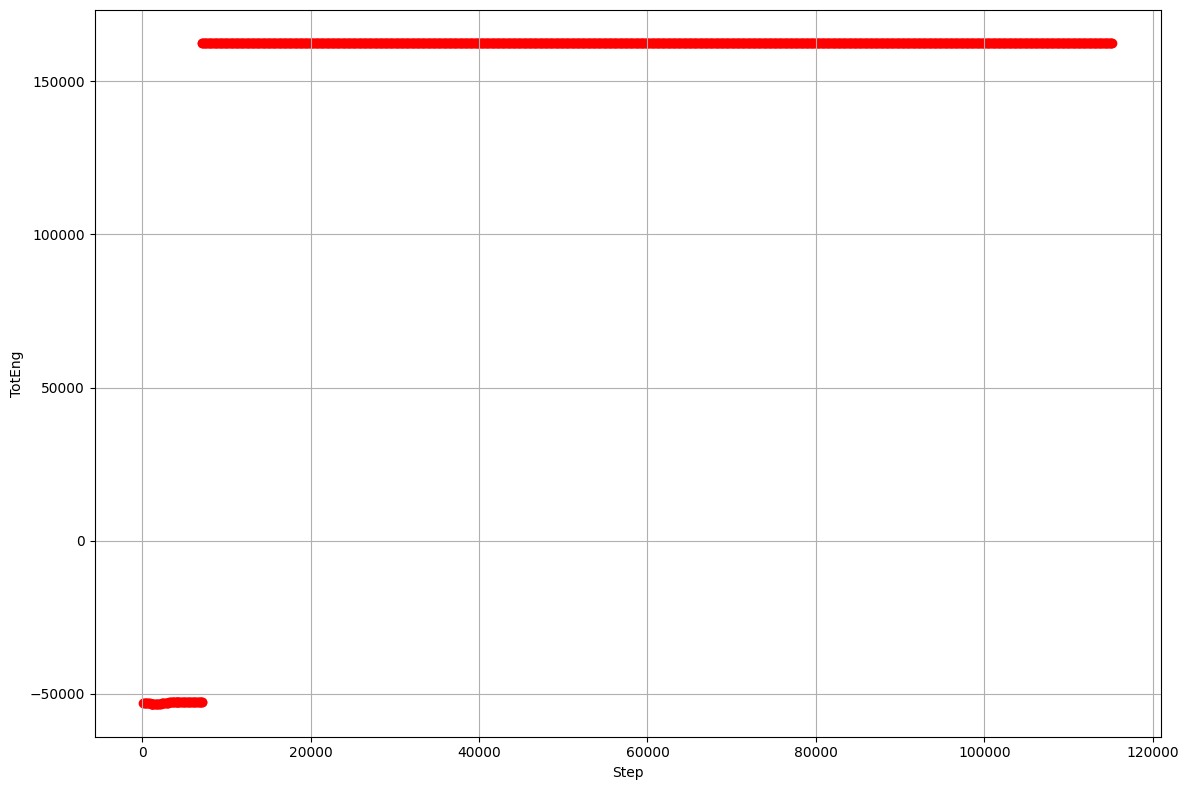

In [125]:
plt.figure(figsize=(12, 8))

plt.scatter(data.Step[data.Time>0], data.TotEng[data.Time>0], label='x', color='r')
plt.xlabel('Step')
plt.ylabel('TotEng')
#plt.title('Среднее количесвто связей')
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
result = pd.read_csv('runs/test_1/results.csv')
result

,Temperature,Velocity
0,325,0.059065
1,225,0.060032
2,200,0.058098
3,350,0.058098
4,250,0.059548
5,300,0.058098
6,275,0.059548
7,375,0.059548


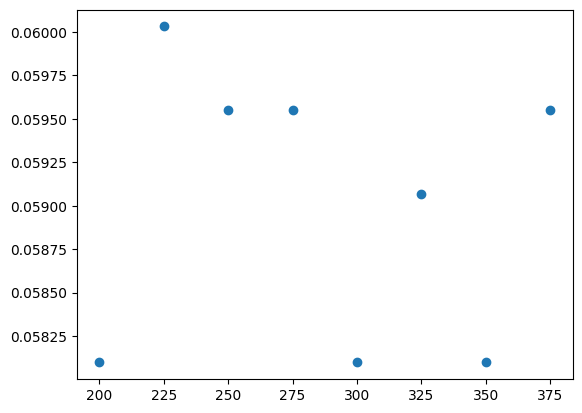

In [25]:
plt.scatter(result.Temperature, result.Velocity)